In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pp
import pandas as pd
import math
rng = np.random.default_rng()

from collections import Counter
from scipy.stats import stats, norm

10  Durchläufe:	Mittelwert:		 0.4422435897435898
10  Durchläufe:	Standardabweichung:	 0.2704475632188596
10  Durchläufe:	KI (99%):		 (0.21003467027274567, 0.6744525092144339) 

50  Durchläufe:	Mittelwert:		 0.3789588744588744
50  Durchläufe:	Standardabweichung:	 0.20202305654467376
50  Durchläufe:	KI (99%):		 (0.30461931602454767, 0.4532984328932011) 

100  Durchläufe:	Mittelwert:		 0.3954969197469198
100  Durchläufe:	Standardabweichung:	 0.18812636499207322
100  Durchläufe:	KI (99%):		 (0.34679465621625055, 0.44419918327758906) 



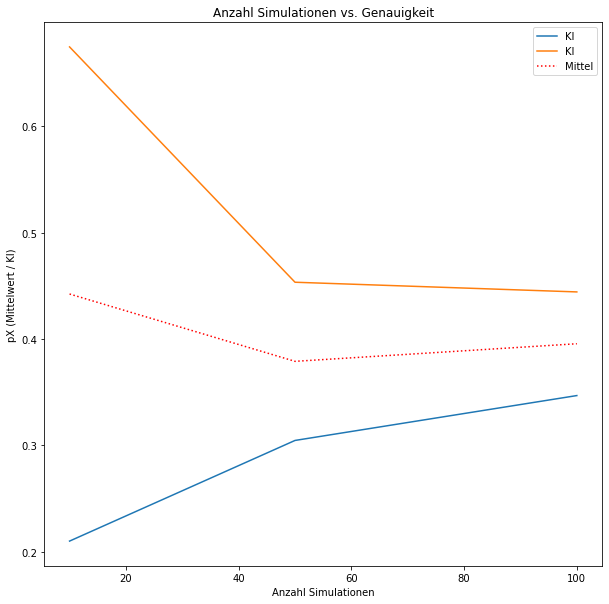

In [2]:


def personBerechtigt():    
    return rng.choice([0, 1], p = [(497 / 500), (3 / 500)])

def personDurchgelassen(istPersonBerechtigt):
    if istPersonBerechtigt:
        return rng.choice([0, 1], p = [(0.05), (0.95)])
    return rng.choice([0, 1], p = [(0.99), (0.01)])

def EinzelSim(n_Pers):
    dfe = pd.DataFrame(columns = ['Berechtigt', 'Durchgelassen'])
    for i in range(n_Pers):
        Berechtigt = personBerechtigt()
        Durchgelassen = personDurchgelassen(Berechtigt)
        dfe = dfe.append({'Berechtigt' : Berechtigt, 'Durchgelassen' : Durchgelassen}, ignore_index = True)
    Anzahl_Ber = len(dfe[(dfe["Berechtigt"] == True)])
    Anzahl_Ber_Durch = len(dfe[(dfe["Berechtigt"] == True) & (dfe["Durchgelassen"] == True)])
    Anzahl_UnBer_Durch = len(dfe[(dfe["Berechtigt"] == False) & (dfe["Durchgelassen"] == True)])
    pX = Anzahl_Ber / (Anzahl_Ber_Durch + Anzahl_UnBer_Durch)
    return pX

n_Pers = 500
n_Sim = [10, 50, 100]

#
def Sim(n_Pers, n_Sim):
    KI_Arr = []
    Mittel_Arr = []
    for n in n_Sim:
        Erg = []
        for elem in range(n):
            Erg.append(EinzelSim(n_Pers))
        #print(Erg)
        Mittel = np.average(Erg)
        StdAbw = np.std(Erg)
        StdFehler = stats.sem(Erg)
        KI = norm.interval(0.99, loc = Mittel, scale = StdFehler)
        KI_Arr.append(KI)
        Mittel_Arr.append(Mittel)
        print(n, " Durchläufe:\tMittelwert:\t\t", Mittel)
        print(n, " Durchläufe:\tStandardabweichung:\t", StdAbw)
        #print(n, " Durchläufe:\tStandardfehler:\t\t", StdFehler)
        print(n, " Durchläufe:\tKI (99%):\t\t", KI, "\n")
    x = n_Sim
    plt.figure(figsize = (10, 10))
    plt.title('Anzahl Simulationen vs. Genauigkeit')
    plt.xlabel('Anzahl Simulationen')
    plt.ylabel('pX (Mittelwert / KI)')
    plt.plot(x, KI_Arr, label = 'KI')
    plt.plot(x, Mittel_Arr, ':r', label = 'Mittel')
    plt.legend(loc = 'best')
    plt.show()

Sim(n_Pers, n_Sim)